In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Загрузка данных
data = pd.read_csv("heart.csv")

In [2]:
def describe_data(data):
    print("Описание данных:\n")
    print(f"Количество наблюдений: {data.shape[0]}")
    print(f"Количество переменных: {data.shape[1]}")
    print("\nТипы переменных:")
    print(data.dtypes)
    print("\nПервые 5 строк данных:")
    print(data.head())

describe_data(data)

# 2. Статистические характеристики
def calculate_statistics(data):
    print("\nСтатистические характеристики:\n")
    print(data.describe())

calculate_statistics(data)

Описание данных:

Количество наблюдений: 270
Количество переменных: 13

Типы переменных:
age                                     float64
sex                                     float64
chest pain type                         float64
resting blood pressure                  float64
serum cholestoral                       float64
fasting blood sugar                     float64
resting electrocardiographic results    float64
maximum heart rate                      float64
exercise induced angina                 float64
oldpeak                                 float64
number of major vessels                 float64
thal                                    float64
desease                                 float64
dtype: object

Первые 5 строк данных:
    age  sex  chest pain type  resting blood pressure  serum cholestoral  \
0  70.0  1.0              4.0                   130.0              322.0   
1  67.0  0.0              3.0                   115.0              564.0   
2  57.0  1.0         

In [17]:
def calculate_statistics(df):
    """Вычисляет статистические характеристики для каждого столбца DataFrame.

    Args:
        df: pandas DataFrame.

    Returns:
        pandas DataFrame со статистическими характеристиками.
    """
    stats = {}
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Проверяем, что столбец числовой
            stats[col] = {
                'Mean': df[col].mean(),
                'Median': df[col].median(),
                'Variance': df[col].var(),
                'Standard Deviation': df[col].std(),
                'Q1 (25%)': df[col].quantile(0.25),
                'Q2 (50%)': df[col].quantile(0.50),  # Медиана
                'Q3 (75%)': df[col].quantile(0.75)
            }
        else:
            stats[col] = {
                'Mode': df[col].mode().iloc[0],  # Мода для категориальных признаков
                'Counts': df[col].value_counts().to_dict()  # Подсчет значений
            }
    return pd.DataFrame(stats)

statistics_df = calculate_statistics(data)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    #print(df)
    print(statistics_df)


                          age       sex  chest pain type  \
Mean                54.433333  0.677778         3.174074   
Median              55.000000  1.000000         3.000000   
Variance            82.975093  0.219207         0.902671   
Standard Deviation   9.109067  0.468195         0.950090   
Q1 (25%)            48.000000  0.000000         3.000000   
Q2 (50%)            55.000000  1.000000         3.000000   
Q3 (75%)            61.000000  1.000000         4.000000   

                    resting blood pressure  serum cholestoral  \
Mean                            131.344444         249.659259   
Median                          130.000000         245.000000   
Variance                        319.037051        2671.467107   
Standard Deviation               17.861608          51.686237   
Q1 (25%)                        120.000000         213.000000   
Q2 (50%)                        130.000000         245.000000   
Q3 (75%)                        140.000000         280.000000   

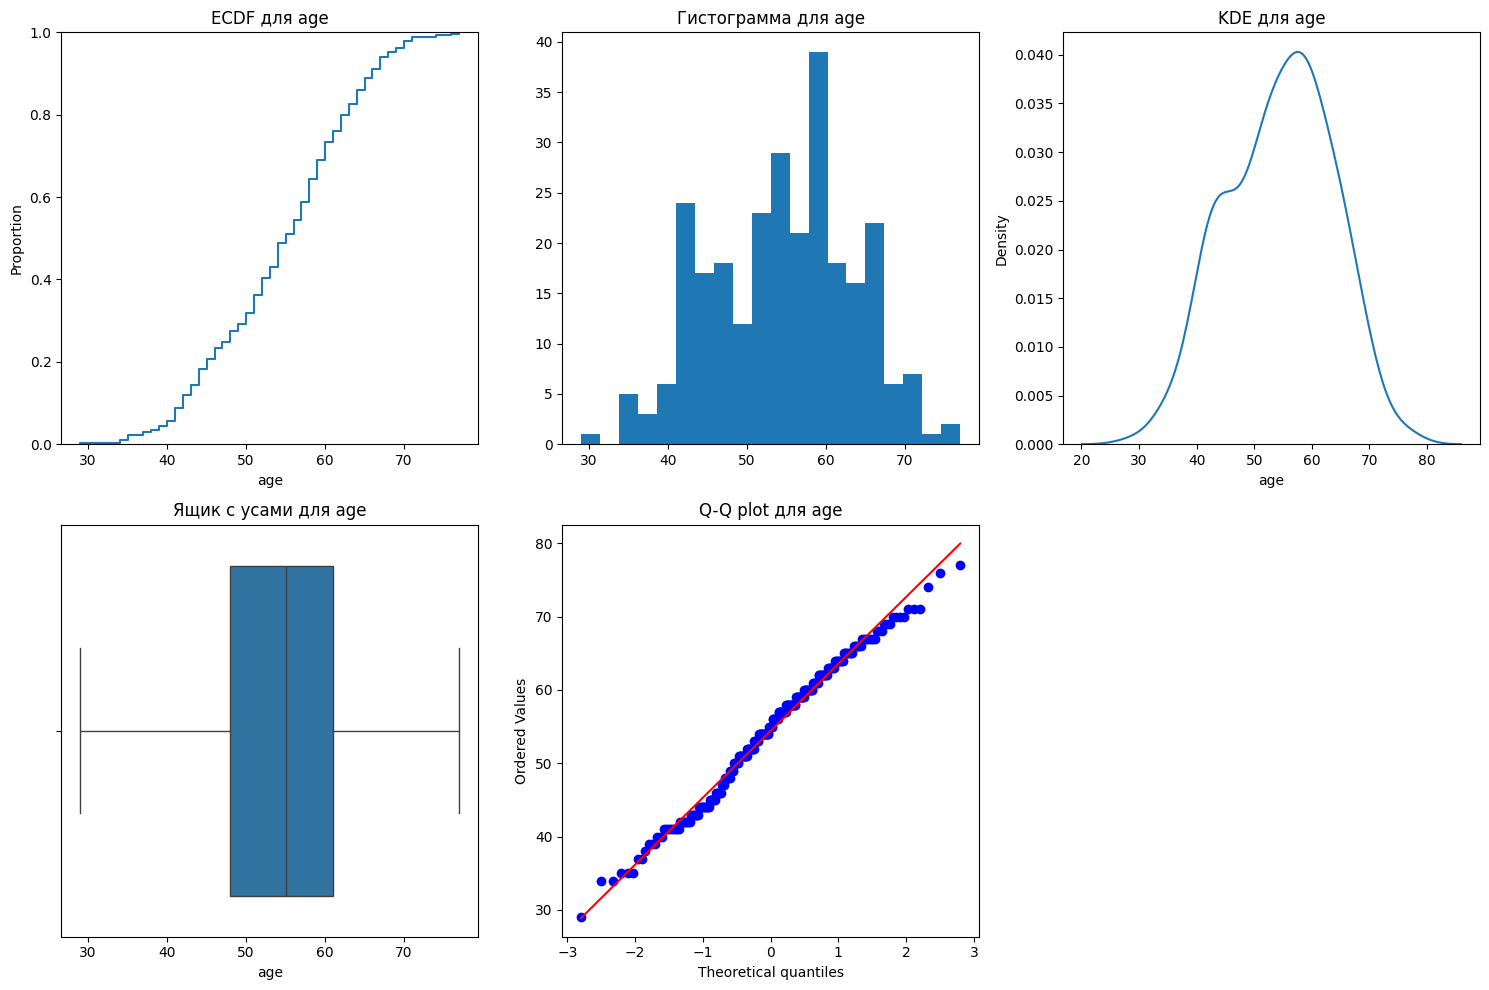

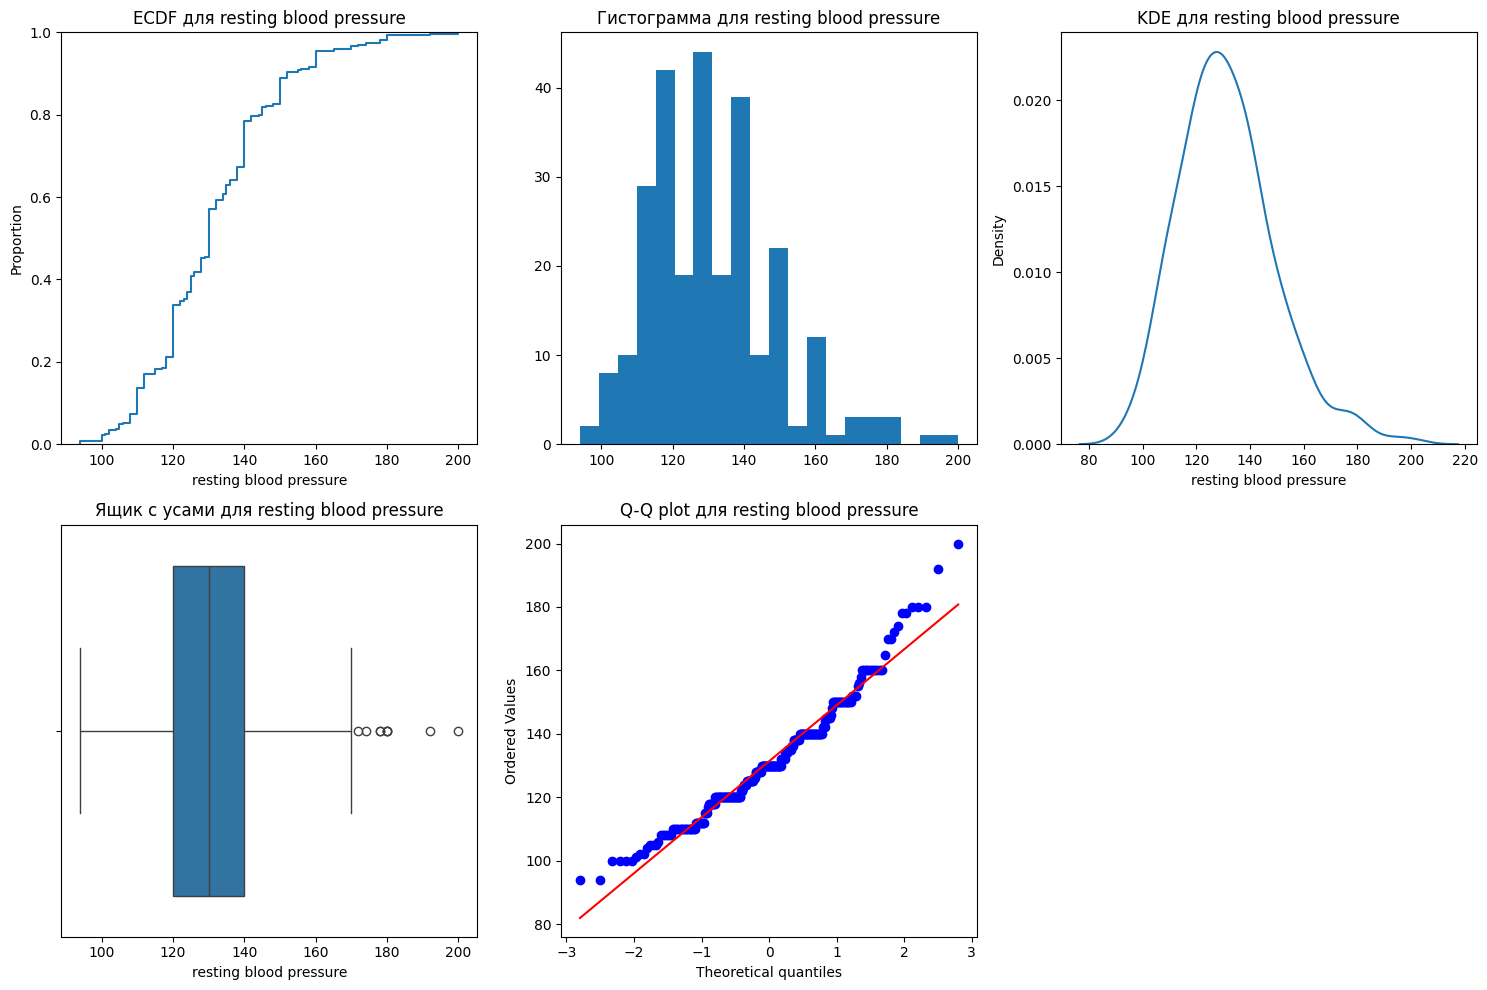

In [4]:
# 3. Графики численных переменных
def plot_numerical_variables(data, variables):
    for var in variables:
        plt.figure(figsize=(15, 10))

        # Эмпирическая функция распределения (ECDF)
        plt.subplot(2, 3, 1)
        sns.ecdfplot(data[var])
        plt.title(f'ECDF для {var}')

        # Гистограмма
        plt.subplot(2, 3, 2)
        plt.hist(data[var], bins=20)
        plt.title(f'Гистограмма для {var}')

        # Ядерная оценка плотности (KDE)
        plt.subplot(2, 3, 3)
        sns.kdeplot(data[var])
        plt.title(f'KDE для {var}')

        # Ящик с усами
        plt.subplot(2, 3, 4)
        sns.boxplot(x=data[var])
        plt.title(f'Ящик с усами для {var}')

        # Выборочная квантиль-нормальная квантиль
        plt.subplot(2, 3, 5)
        stats.probplot(data[var], dist="norm", plot=plt)
        plt.title(f'Q-Q plot для {var}')

        plt.tight_layout()
        plt.show()
# ['age', 'resting blood pressure', 'serum cholestoral', 'maximum heart rate', 'oldpeak']
numerical_vars = ['age', 'resting blood pressure']
plot_numerical_variables(data, numerical_vars)

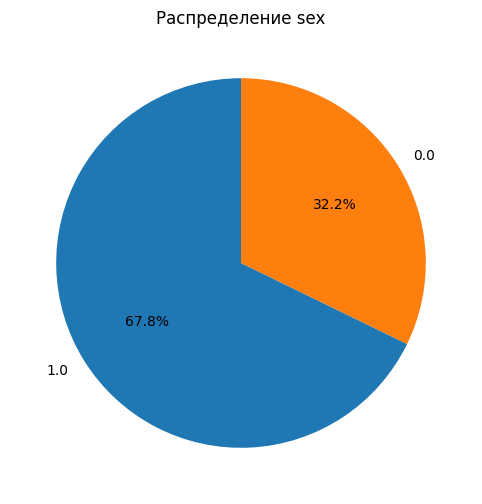

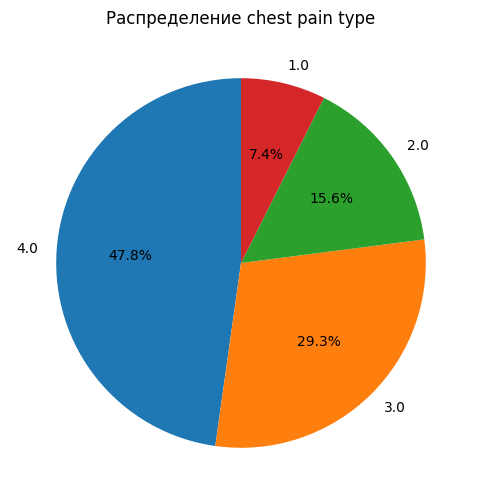

In [5]:
# 4. Графики категориальных переменных
def plot_categorical_variables(data, variables):
    for var in variables:
        plt.figure(figsize=(8, 6))
        data[var].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
        plt.title(f'Распределение {var}')
        plt.ylabel('')
        plt.show()
#['sex', 'chest pain type', 'fasting blood sugar', 'resting electrocardiographic results',
#                    'exercise induced angina', 'number of major vessels', 'thal', 'desease']
categorical_vars = ['sex', 'chest pain type']
plot_categorical_variables(data, categorical_vars)

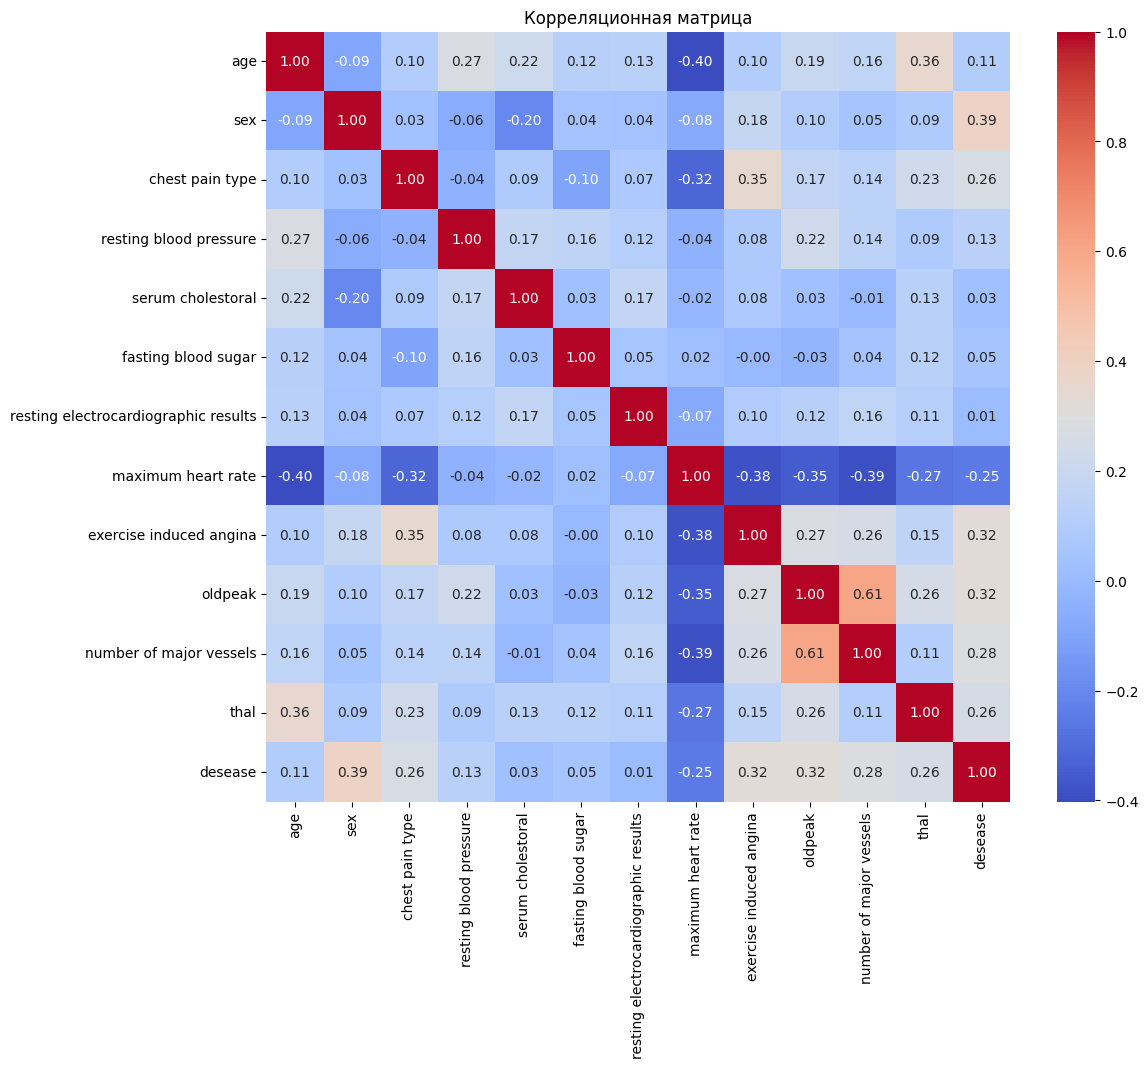

In [6]:
# 5. Корреляционная матрица
def plot_correlation_matrix(data):
    plt.figure(figsize=(12, 10))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Корреляционная матрица')
    plt.show()

plot_correlation_matrix(data)

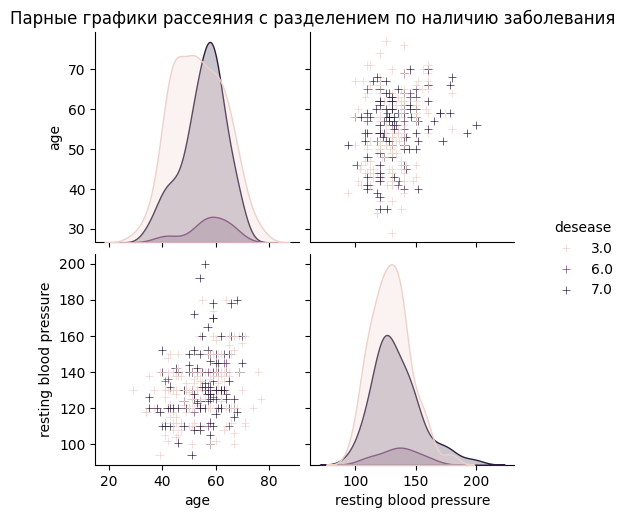

In [7]:
# 6. Парные графики рассеяния (pairplot)
def plot_pairplot(data, variables):
    sns.pairplot(data[variables + ['desease']], hue='desease', diag_kind='kde', markers='+')
    plt.suptitle('Парные графики рассеяния с разделением по наличию заболевания', y=1.02)
    plt.show()

plot_pairplot(data, numerical_vars)

C:\Users\jds10\AppData\Local\Temp\ipykernel_22212\2832211218.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=cont_var, data=data, ax=axes[1], palette="muted")


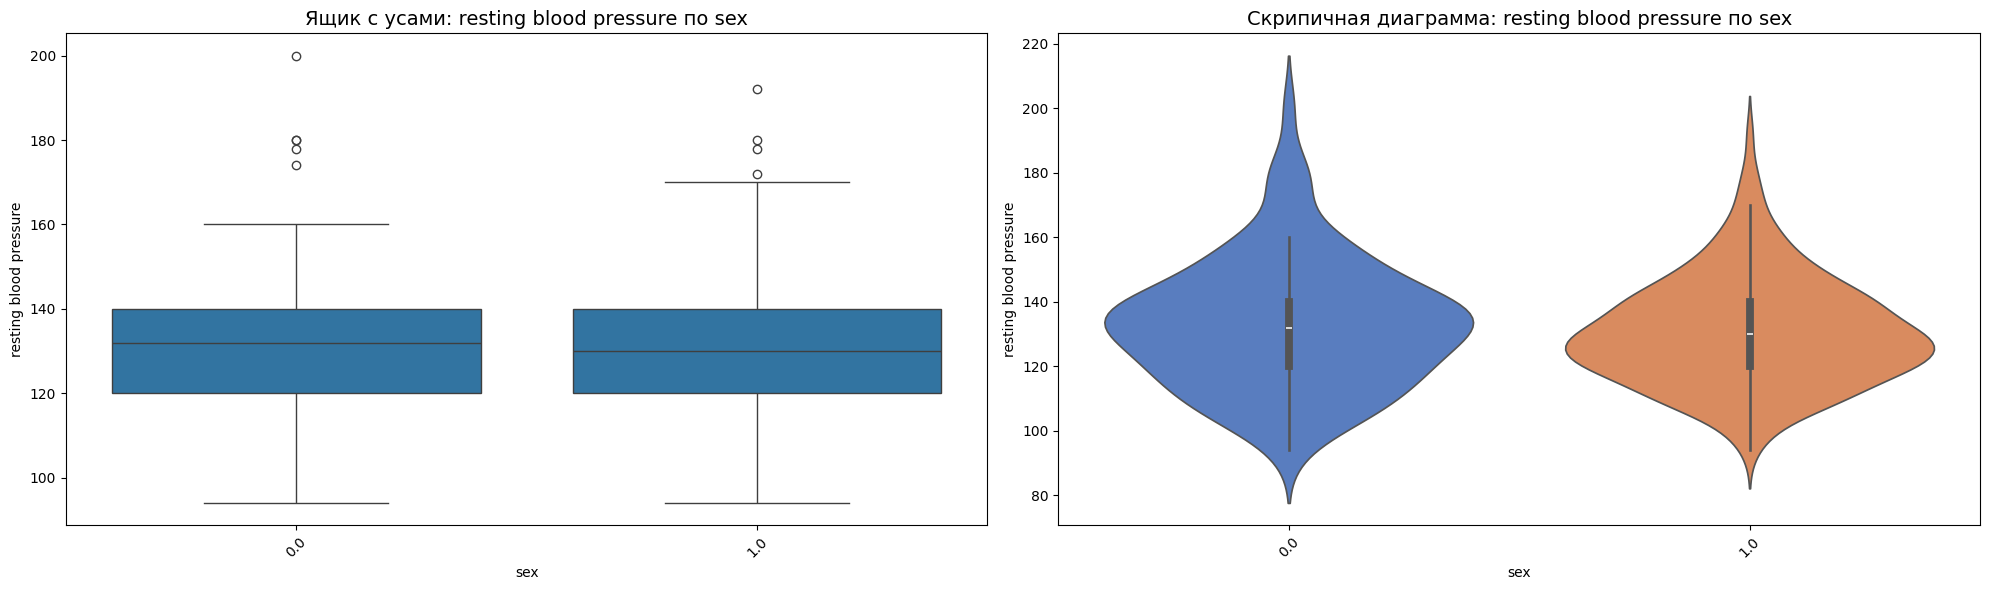

C:\Users\jds10\AppData\Local\Temp\ipykernel_22212\2832211218.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=cat_var, y=cont_var, data=data, ax=axes[1], palette="muted")


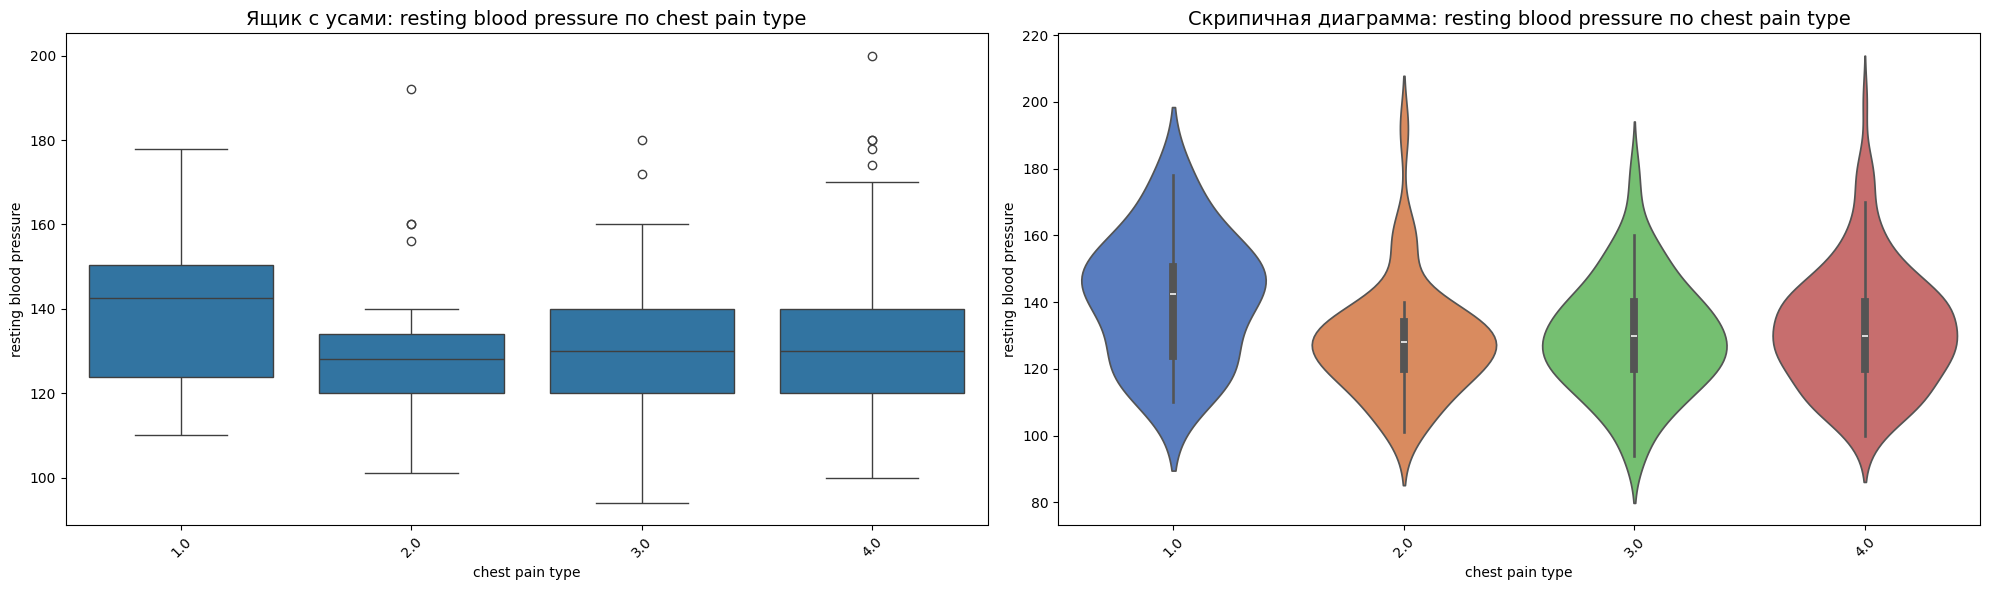

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_categorical_vs_continuous(data, categorical_vars, continuous_vars):
    for cat_var in categorical_vars:
        for cont_var in continuous_vars:
            # Создаем фигуру с двумя подграфиками (боксплот и виолин-плот)
            fig, axes = plt.subplots(1, 2, figsize=(20, 6))
            
            # Боксплот
            sns.boxplot(x=cat_var, y=cont_var, data=data, ax=axes[0])
            axes[0].set_title(f'Ящик с усами: {cont_var} по {cat_var}', fontsize=14)
            axes[0].tick_params(axis='x', rotation=45)
            
            # Виолин-плот
            sns.violinplot(x=cat_var, y=cont_var, data=data, ax=axes[1], palette="muted")
            axes[1].set_title(f'Скрипичная диаграмма: {cont_var} по {cat_var}', fontsize=14)
            axes[1].tick_params(axis='x', rotation=45)
            
            # Улучшаем расположение подграфиков
            plt.tight_layout()
            plt.show()

# Пример использования:
categorical_vars = ['sex', 'chest pain type']
#numerical_vars = ['fasting blood sugar', 'resting electrocardiographic results',
#                 'exercise induced angina', 'number of major vessels', 'thal']
numerical_vars = ['resting blood pressure']
# Предполагается, что DataFrame называется `data`
plot_categorical_vs_continuous(data, categorical_vars, numerical_vars)

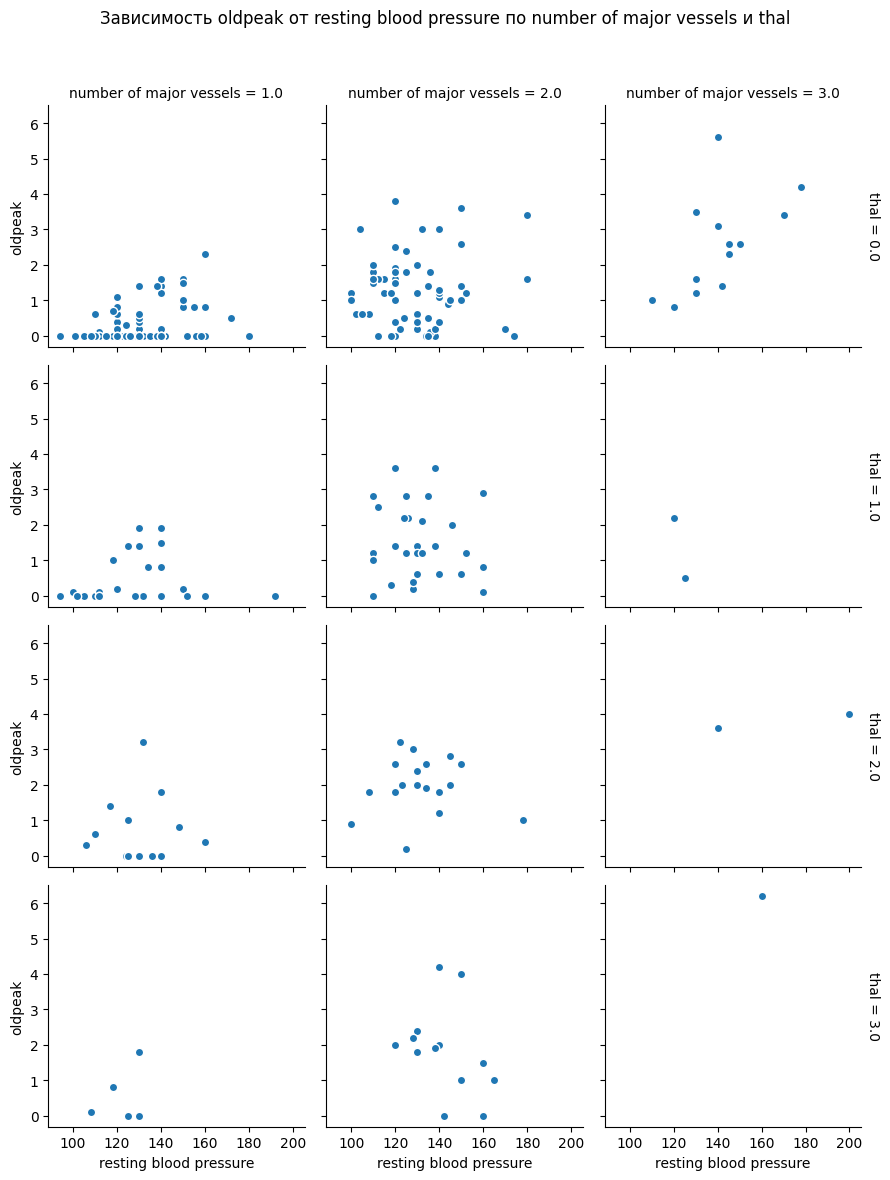

In [10]:
# 8. Условные графики (coplot) - эмуляция с facet grid
def plot_coplot_emulation(data, cont_var1, cont_var2, cat_var1, cat_var2):
    g = sns.FacetGrid(data, col=cat_var1, row=cat_var2, margin_titles=True)
    g.map(plt.scatter, cont_var1, cont_var2, edgecolor="w")
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(f'Зависимость {cont_var2} от {cont_var1} по {cat_var1} и {cat_var2}')
    plt.show()

#plot_coplot_emulation(data, 'age', 'maximum heart rate', 'sex', 'chest pain type')
#plot_coplot_emulation(data, 'age', 'serum cholestoral', 'fasting blood sugar', 'exercise induced angina')
plot_coplot_emulation(data, 'resting blood pressure', 'oldpeak', 'number of major vessels', 'thal')